In [ ]:
!pip install pandas seaborn matplotlib scikit-learn numpy

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:

df =  pd.read_csv("telco.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df.drop(columns="customerID",inplace=True)

In [14]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Converting columns to binary classification

In [71]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df["Churn"] = df["Churn"].map(lambda x: 1 if x =="Yes" else 0 if x == "No" else x)

In [72]:
df_binary = pd.get_dummies(df)
df_binary.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [73]:
df_binary.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

In [74]:
total_churn =  df_binary["Churn"].loc[df_binary["Churn"]==1].count()
total = len(df_binary)
print(round(total_churn/total * 100,2),"% number of customers who left witin the last month")

26.54 % number of customers who left witin the last month


### Question:
#### At which threshold of monthly charges do most customers churn

In [76]:
df_binary['charge_bin'] = pd.cut(df_binary['MonthlyCharges'], bins=np.arange(0, df_binary['MonthlyCharges'].max()+10, 10))
df_binary.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,charge_bin
0,0,1,29.85,29.85,0,True,False,False,True,True,...,True,False,False,False,True,False,False,True,False,"(20.0, 30.0]"
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,True,False,True,False,False,False,False,True,"(50.0, 60.0]"
2,0,2,53.85,108.15,1,False,True,True,False,True,...,True,False,False,False,True,False,False,False,True,"(50.0, 60.0]"
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,True,False,True,False,True,False,False,False,"(40.0, 50.0]"
4,0,2,70.70,151.65,1,True,False,True,False,True,...,True,False,False,False,True,False,False,True,False,"(70.0, 80.0]"


In [88]:
df_binary.dropna(inplace=True)

In [89]:
churn_rate = df_binary.groupby('charge_bin',observed=False)['Churn'].mean()
print(churn_rate)


charge_bin
(0.0, 10.0]            NaN
(10.0, 20.0]      0.088821
(20.0, 30.0]      0.104628
(30.0, 40.0]      0.281081
(40.0, 50.0]      0.318872
(50.0, 60.0]      0.209076
(60.0, 70.0]      0.207024
(70.0, 80.0]      0.394105
(80.0, 90.0]      0.362851
(90.0, 100.0]     0.378734
(100.0, 110.0]    0.327511
(110.0, 120.0]    0.130233
Name: Churn, dtype: float64


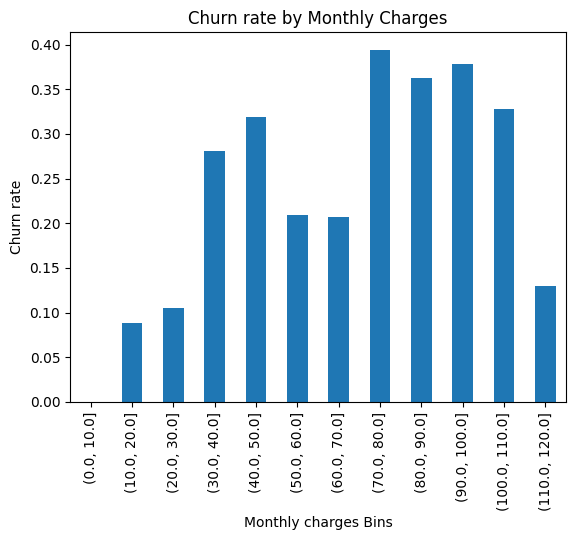

In [90]:
churn_rate.plot(kind="bar")
plt.title("Churn rate by Monthly Charges")
plt.xlabel("Monthly charges Bins")
plt.ylabel("Churn rate")
plt.show()

#### Using Machine Learning to predict a Customers at risk of Churning 


In [91]:
y = df_binary['Churn']
X = df_binary.drop(["Churn","charge_bin"],axis=1)
print(len(X),len(y))

7032 7032


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.2,random_state=55,stratify=y)
X_train


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5599,0,9,94.85,890.60,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
2969,0,65,109.30,7337.55,True,False,False,True,False,True,...,True,False,False,True,True,False,False,False,True,False
3238,0,26,19.65,494.90,True,False,False,True,False,True,...,False,False,False,True,True,False,False,True,False,False
1058,0,2,89.55,185.55,False,True,False,True,False,True,...,True,True,False,False,False,True,True,False,False,False
5280,0,33,79.15,2531.40,True,False,False,True,False,True,...,True,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,0,2,73.25,131.05,False,True,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
4883,1,8,29.40,221.90,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
6185,0,50,103.95,5231.30,False,True,False,True,True,False,...,True,False,True,False,False,True,False,False,True,False
1575,0,66,99.50,6710.50,False,True,True,False,True,False,...,True,True,False,False,True,False,False,False,True,False


In [105]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [106]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))


[[938  95]
 [163 211]]


### Understanding the confusion matric

Confusion matric are 2x2 matrics that compares my model's predicted churn to the actual churn values from test dataset being 20% of the original dataset. Using these values one can further optimize model by choosing what to minimize or maximize with the classification report shows options such as accuraccy, recall,and f1-score which can be derived from the confusion matric. 

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.69      0.56      0.62       374

    accuracy                           0.82      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407



In [ ]:
y_probs = model.predict_proba(X_test)[:,1]
test_prob = pd.DataFrame()
test_prob["Churn_Risk_Score"]= y_probs
test_prob.head()

,churn_risk_score
0,0.578562
1,0.707732
2,0.633516
3,0.577361
4,0.040126


In [110]:
test_prob["At Risk"]= (test_prob["churn_risk_score"]>0.65)
test_prob.head()

,churn_risk_score,At Risk
0,0.578562,False
1,0.707732,True
2,0.633516,False
3,0.577361,False
4,0.040126,False
